In [ ]:
from collections import Counter
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (8, 6)
import numpy as np
from scipy.optimize import curve_fit

from google.colab import files

In [ ]:
def save(filename, **kwargs):
    if not os.path.isdir("plots"):
        os.makedirs("plots")
    plt.savefig(f"plots/{filename}.png", bbox_inches='tight', **kwargs)
    plt.savefig(f"plots/{filename}.pdf", bbox_inches='tight', **kwargs)

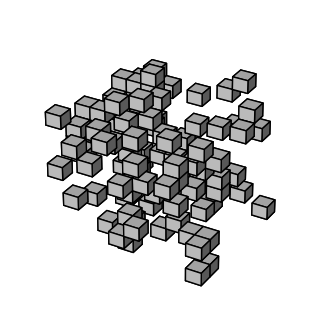

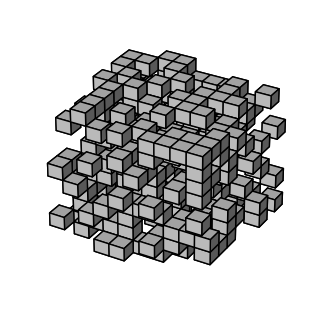

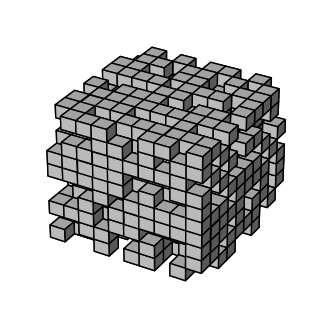

In [ ]:
# Visualize percolation on a 3D lattice

L = 10
probability = [0.1, 0.3116, 0.6]
rng = np.random.default_rng(seed=0)

for i, p in enumerate(probability):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')
    filled = rng.choice([0, 1], size=(L, L, L), p=[1 - p, p])
    ax.voxels(filled, facecolors='lightgray', edgecolor='black')
    ax.axis('off')
    save(f"percolation_visualization_{i}", pad_inches=0)
    plt.show()
    plt.close(fig)

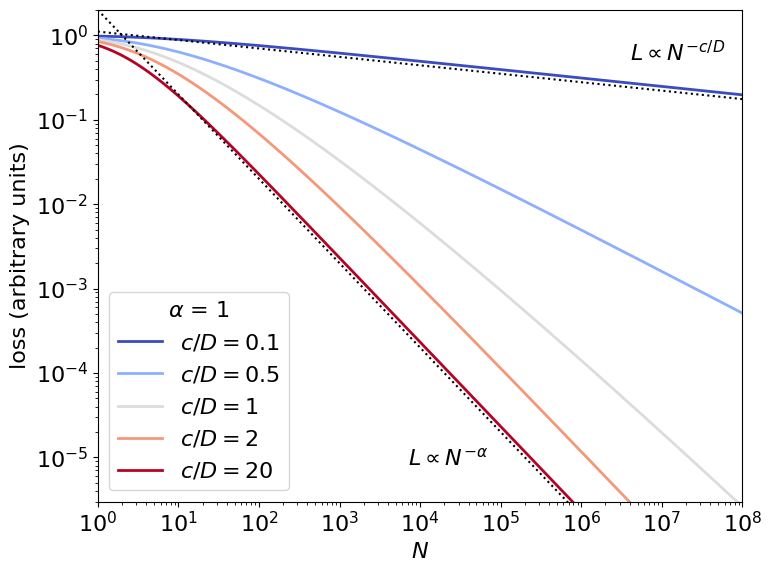

In [ ]:
# Model scaling

alpha = 1.0
cDs = [0.1, 0.5, 1, 2, 20]
colors = np.linspace(0, 1, len(cDs))
cmap = colormaps['coolwarm']

kbr = np.geomspace(1, 1e7, 10000)
epsilon = 1e-6
fig, ax = plt.subplots(1, 1)
for i, cD in enumerate(cDs):
    b = np.where(cD - alpha >= 0, 1, -1)*(np.abs(cD - alpha) + epsilon)/(cD + 1)
    p = kbr*(1 - kbr**-b)/b
    loss = (p/kbr + 1/alpha)*kbr**-alpha
    ax.plot(p, loss, linewidth=2, color=cmap(colors[i]), label=f"$c/D = {cD:.02g}$")
p = np.geomspace(1, 1e15, 1000)
ax.plot(p, (1 + 1/alpha) * p**-alpha, 'k:')
ax.plot(p, (alpha/(cDs[0] + 1))**-(cDs[0] + 1) * p**-cDs[0], 'k:')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 1e8])
ax.set_ylim([3e-6, 2.0])
ax.text(4e6, 5e-1, r"$L \propto N^{-c/D}$")
ax.text(7e3, 8e-6, r"$L \propto N^{-\alpha}$")
ax.set_xlabel(r"$N$")
ax.set_ylabel("loss (arbitrary units)")
ax.legend(title=rf"$\alpha$ = {alpha:.02g}")
fig.tight_layout()

save("theoretical_model_scaling")

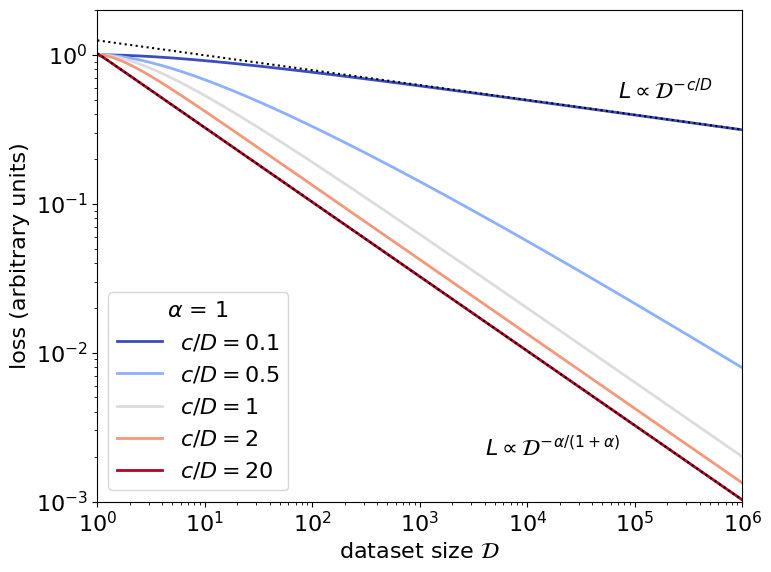

In [ ]:
# Data scaling

alpha = 1.0
cDs = [0.1, 0.5, 1, 2, 20]
colors = np.linspace(0, 1, len(cDs))
cmap = colormaps['coolwarm']

aa = alpha/(1 + alpha)
D = np.geomspace(1, 1e6, 10000)
fig, ax = plt.subplots(1, 1)
for i, cD in enumerate(cDs):
    if cD == aa:
        loss = alpha**-(cD + 1) * (1 + cD*np.log(alpha) + cD*np.log(D)) * D**-cD
    else:
        coeff1 = alpha**-(aa + 1) / (1 - aa/cD)
        coeff2 = alpha**-(cD + 1) / (1 - cD/aa)
        loss = coeff1*D**-aa + coeff2*D**-cD
    ax.plot(D, loss, linewidth=2, color=cmap(colors[i]), label=f"$c/D = {cD:.02g}$")
ax.plot(D, alpha**-(aa + 1) / (1 - aa/cDs[-1]) * D**-aa, 'k:')
ax.plot(D, alpha**-(cDs[0] + 1) / (1 - cDs[0]/aa) * D**-cDs[0], 'k:')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 1e6])
ax.set_ylim([1e-3, 2.0])
ax.text(7e4, 5e-1, r"$L \propto \mathcal{D}^{-c/D}$")
ax.text(4e3, 2e-3, r"$L \propto \mathcal{D}^{-\alpha/(1 + \alpha)}$")
ax.set_xlabel("dataset size $\mathcal{D}$")
ax.set_ylabel("loss (arbitrary units)")
ax.legend(title=rf"$\alpha$ = {alpha:.02g}")
fig.tight_layout()

save("theoretical_data_scaling")

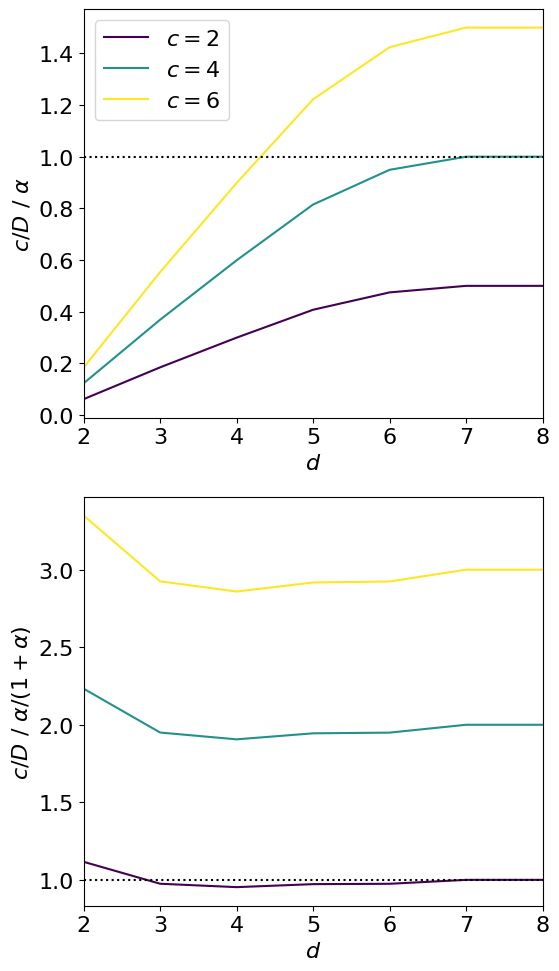

In [ ]:
# Scaling parameters as a function of dimension
# Values for tau for d=2 and D: Introduction to Percolation Theory by Stauffer & Aharony
# Values for tau for d=3-13:
# Percolation Thresholds and Fisher Exponents in Hypercubic Lattices,
# Mertens & Moore (2018), arXiv:1806.08067
fig, axes = plt.subplots(2, 1, figsize=(6, 10))
d = np.array([2, 3, 4, 5, 6, 7, 8])
tau = np.array([187/91, 2.1892, 2.3142, 2.419, 2.487, 2.5, 2.5])
D = np.array([91/48, 2.53, 3.06, 3.54, 4, 4, 4])
assert len(d) == len(tau) == len(D)
alpha = (3 - tau)/(tau - 2)
aa = alpha/(1 + alpha)

cs = np.array([2, 4, 6])
colors = np.linspace(0, 1, len(cs))
cmap = colormaps['viridis']

for i, c in enumerate(cs):
    cD = c/D
    axes[0].plot(d, cD/alpha, color=cmap(colors[i]), label=f"$c = {c}$")
    axes[1].plot(d, cD/aa, color=cmap(colors[i]), label=f"$c = {c}$")

for ax in axes:
    ax.plot(d, np.ones_like(d), 'k:')
    ax.set_xlabel(r"$d$")
    ax.set_xlim([2, len(d) + 1])

axes[0].set_ylabel(r"$c/D~/~\alpha$")
axes[0].legend()
axes[1].set_ylabel(r"$c/D~/~\alpha/(1 + \alpha)$")

fig.tight_layout()

save("scaling_comparison")

Best fit const: 0.57 +- 0.05
Best fit index: 0.387 +- 0.004


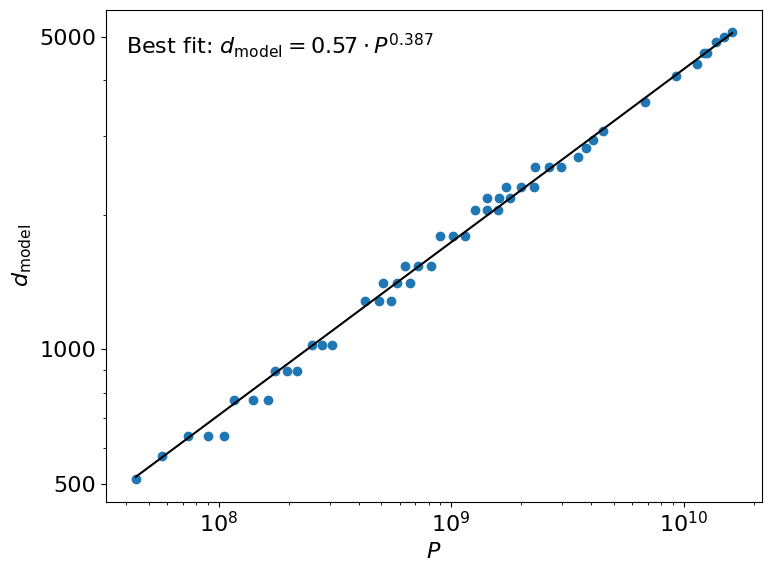

In [ ]:
# Chinchilla scaling

# Hoffman et al. (2022), Table A9
# https://arxiv.org/abs/2203.15556
parameters = np.array([44, 57, 74, 90, 106, 117, 140, 163, 175, 196, 217, 251, 278, 306, 425, 489, 509, 552,
                       587, 632, 664, 724, 816, 893, 1018, 1143, 1266, 1424, 1429, 1593, 1609, 1731, 1794,
                       2007, 2283, 2298, 2639, 2980, 3530, 3802, 4084, 4516, 6796, 9293, 11452, 12295, 12569,
                       13735, 14940, 16183])*1e6
dmodels = np.array([512, 576, 640, 640, 640, 768, 768, 768, 896, 896, 896, 1024, 1024, 1024, 1280, 1280,
                    1408, 1280, 1408, 1536, 1408, 1536, 1536, 1792, 1792, 1792, 2048, 2176, 2048, 2048, 2176,
                    2304, 2176, 2304, 2304, 2560, 2560, 2560, 2688, 2816, 2944, 3072, 3584, 4096, 4352, 4608,
                    4608, 4864, 4992, 5120])

def power_law(x, const, index):
    return const*x**index

popt, pcov = curve_fit(power_law, parameters, dmodels)
perr = np.sqrt(np.diag(pcov))
const, const_err = popt[0], perr[0]
index, index_err = popt[1], perr[1]

print(f"Best fit const: {const:.2f} +- {const_err:.2f}")
print(f"Best fit index: {index:.3f} +- {index_err:.3f}")

fig, ax = plt.subplots(1, 1)
ax.plot(parameters, dmodels, 'o')
ax.plot(parameters, const*parameters**index, 'k')
ax.set_xlabel("$P$")
ax.set_ylabel("$d_\mathrm{model}$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks([500, 1000, 5000])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.text(4e7, 4600, f"Best fit: $d_\mathrm{{model}} = {const:.2f} \cdot P^{{{index:.3f}}}$")

fig.tight_layout()

save("chinchilla_scaling")

In [ ]:
!cd /content/plots && zip -r ../theory_plots.zip *
files.download("theory_plots.zip")

  adding: chinchilla_scaling.pdf (deflated 36%)
  adding: chinchilla_scaling.png (deflated 12%)
  adding: percolation_visualization_0.pdf (deflated 4%)
  adding: percolation_visualization_0.png (deflated 10%)
  adding: percolation_visualization_1.pdf (deflated 2%)
  adding: percolation_visualization_1.png (deflated 9%)
  adding: percolation_visualization_2.pdf (deflated 1%)
  adding: percolation_visualization_2.png (deflated 9%)
  adding: scaling_comparison.pdf (deflated 38%)
  adding: scaling_comparison.png (deflated 8%)
  adding: theoretical_data_scaling.pdf (deflated 38%)
  adding: theoretical_data_scaling.png (deflated 5%)
  adding: theoretical_model_scaling.pdf (deflated 32%)
  adding: theoretical_model_scaling.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>